In [63]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, losses
import matplotlib.pyplot as plt
import numpy as np
import math
from collections import Counter
print(tf.__version__)

2.1.0


In [64]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
num_classes = 10

In [65]:
### Data exploration ###
print('train_images.shape = ', train_images.shape)
print('train_labels.shape = ', train_labels.shape)
print('test_images.shape = ', test_images.shape)
print('test_labels.shape = ', test_labels.shape)

train_images.shape =  (50000, 32, 32, 3)
train_labels.shape =  (50000, 1)
test_images.shape =  (10000, 32, 32, 3)
test_labels.shape =  (10000, 1)


In [66]:
### Data exploration - outputs ###
set_labels = set(np.reshape(train_labels, (-1)))
train_count = Counter(np.reshape(train_labels, (-1)))
test_count = Counter(np.reshape(test_labels, (-1)))
print('labels = ', set_labels)
print('train_count = ', train_count)
print('test_count = ', test_count)

labels =  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
train_count =  Counter({6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000})
test_count =  Counter({3: 1000, 8: 1000, 0: 1000, 6: 1000, 1: 1000, 9: 1000, 5: 1000, 7: 1000, 4: 1000, 2: 1000})


In [67]:
### Converting to one-hot encoding ###
train_labels = np.array(tf.one_hot(train_labels, depth = num_classes))
test_labels = np.array(tf.one_hot(test_labels, depth = num_classes))

In [68]:
train_labels = np.reshape(train_labels, (-1, num_classes))
test_labels = np.reshape(test_labels, (-1, num_classes))
print('train_labels.shape = ', train_labels.shape)
print('test_labels.shape = ', test_labels.shape)
print('train_labels[0] = ', train_labels[0])

train_labels.shape =  (50000, 10)
test_labels.shape =  (10000, 10)
train_labels[0] =  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [69]:
### Data exploration - inputs ###
print(type(train_images[0]))
min_input_value = min(np.min(train_images), np.min(test_images))
max_input_value = max(np.max(train_images), np.max(test_images))
print('min_input_value = ', min_input_value)
print('max_input_value = ', max_input_value)

<class 'numpy.ndarray'>
min_input_value =  0
max_input_value =  255


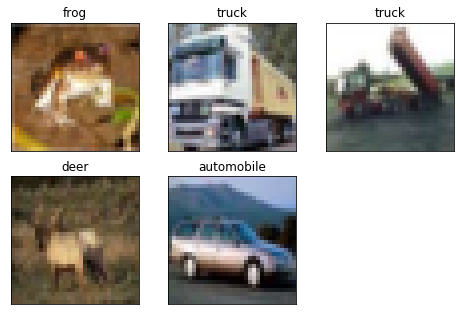

In [70]:
### Plotting a few images ###
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_examples(x, y = None, figsize = (8, 8)):
    
    ncols = math.ceil(len(x) ** (1/2))
    nrows = ncols
    plt.figure(figsize = figsize)
    
    for i in range(len(x)):
        ax = plt.subplot(nrows, ncols, i+1)
        plt.imshow(x[i])
        if y.any():
            plt.title(class_names[np.argmax(y[i])])
        plt.xticks([])
        plt.yticks([])
    

            
plot_examples(train_images[:5], train_labels[:5])

In [71]:
### Normalization ###
train_images = train_images / 255
test_images = test_images / 255

In [72]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), input_shape = (32, 32, 3), activation = 'relu'))#, data_format='channels_last'))
model.add(layers.Dropout(rate = 0.5))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Dropout(rate = 0.5))

model.add(layers.BatchNormalization())

model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.Dropout(rate = 0.5))

model.add(layers.Flatten())
model.add(layers.Dense(num_classes, activation = 'softmax'))

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
dropout_59 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 4, 4, 64)        

In [73]:
### Checking so that dimensions are as expected ###
print(train_images[0:2].shape)
pred = model.predict(train_images[0:2])
print(pred.shape)
print(pred)

(2, 32, 32, 3)
(2, 10)
[[0.09927728 0.10697488 0.09525497 0.10453466 0.09736192 0.09812295
  0.10039013 0.09962079 0.10054462 0.09791782]
 [0.09999253 0.10647583 0.09704164 0.10356229 0.09923132 0.09471498
  0.10109723 0.09924958 0.10171548 0.09691908]]


In [74]:
### Choosing optimizer and compiling ###
opt = optimizers.Adam(learning_rate = 0.001)
loss_func = losses.CategoricalCrossentropy()
model.compile(opt, loss = loss_func, metrics = ['accuracy'])

In [88]:
### Training the model ###
batch_size = 32
num_epochs = 10

history = model.fit(train_images, 
                    train_labels,
                    batch_size = batch_size,
                    epochs = num_epochs,
                    validation_data = (test_images, test_labels)
                    )

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 300s 6ms/sample - loss: 0.8415 - accuracy: 0.7076 - val_loss: 0.7375 - val_accuracy: 0.7438
Epoch 2/10
50000/50000 [==============================] - 287s 6ms/sample - loss: 0.8318 - accuracy: 0.7125 - val_loss: 0.7442 - val_accuracy: 0.7436
Epoch 3/10
50000/50000 [==============================] - 326s 7ms/sample - loss: 0.8227 - accuracy: 0.7167 - val_loss: 0.7400 - val_accuracy: 0.7443
Epoch 4/10
50000/50000 [==============================] - 310s 6ms/sample - loss: 0.8147 - accuracy: 0.7200 - val_loss: 0.7851 - val_accuracy: 0.7274
Epoch 5/10
50000/50000 [==============================] - 314s 6ms/sample - loss: 0.8097 - accuracy: 0.7208 - val_loss: 0.7330 - val_accuracy: 0.7491
Epoch 6/10
50000/50000 [==============================] - 294s 6ms/sample - loss: 0.7991 - accuracy: 0.7244 - val_loss: 0.7491 - val_accuracy: 0.7405
Epoch 7/10
50000/50000 [==========================

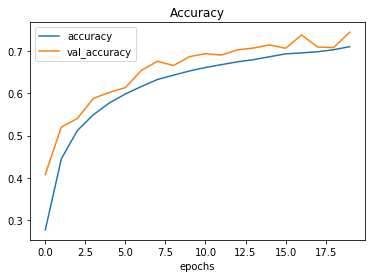

In [86]:
### Evaluating the model - accuracy ###
plt.plot(np.append(saving_history.history['accuracy'], history.history['accuracy']), label = 'accuracy')
plt.plot(np.append(saving_history.history['val_accuracy'], history.history['val_accuracy']), label = 'val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

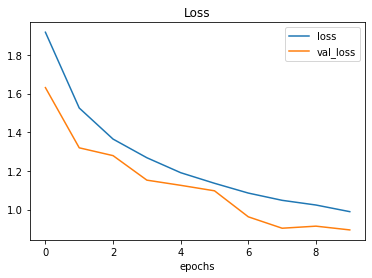

In [80]:
### Evaluating the model - loss ###
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [81]:
saving_history = history

In [87]:
saving_history2 = history

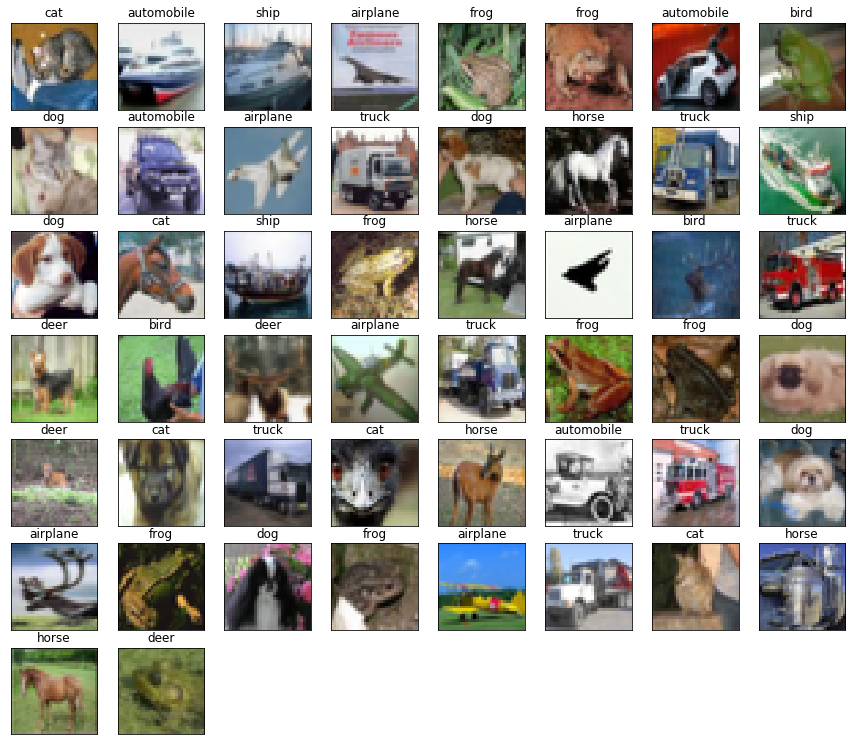

In [78]:
### Making some predictions ###
x = test_images[:50]
pred = model.predict(x)
plot_examples(x, pred, figsize = (15, 15))